In [1]:
# 1. make multiclass dataset

# 2. implement stochastic gradient descent.
#    - stochastic gradient descent takes batch size = 1
#      to estimate the error gradient.

# 3. one hot encode output variable

# 4. define model

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.datasets._samples_generator import make_blobs
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# generating 2d classification dataset
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, cluster_std = 2, random_state = 2)

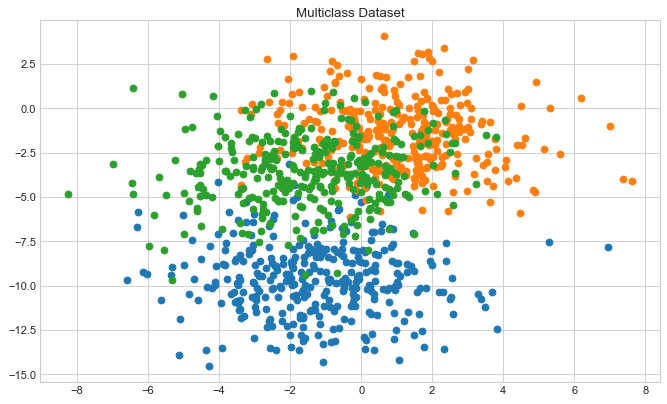

In [4]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.title("Multiclass Dataset", pad = -40)
for class_value in range(3) :
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [5]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [6]:
# define model :
def create_moedel(opt = SGD(learning_rate = .01, momentum = .9), 
                  loss = "categorical_crossentropy", **kwargs) -> None :
    model = Sequential()
    model.add(Dense(50, input_dim = 2, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dense(3, activation = "softmax"))
    # ---- Compile model ----
    model.compile(loss = loss, optimizer = opt, metrics = ["accuracy"])
    return model

model = create_moedel()

# fit the model :
history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 200, verbose = 0, batch_size = 1)

# evaluate the model :
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print(f"train accuracy : {round(train_acc, 2)}  | test accuracy : {round(test_acc, 2)}")

train accuracy : 0.44  | test accuracy : 0.48


- took 3 minutes !!

- poor accuracy on both the dataset.

- clearly model underfitting the data.

In [7]:
import pandas as pd
loss = pd.DataFrame(history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.710048,0.500,0.994790,0.596
1,1.087214,0.500,0.927139,0.572
2,0.971731,0.506,0.955464,0.524
3,0.944458,0.528,0.989468,0.490
4,0.979991,0.500,0.883478,0.566


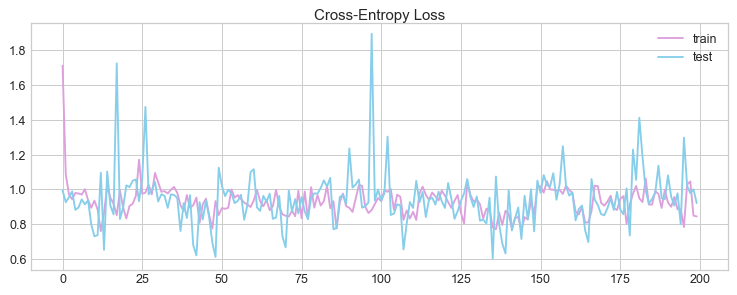

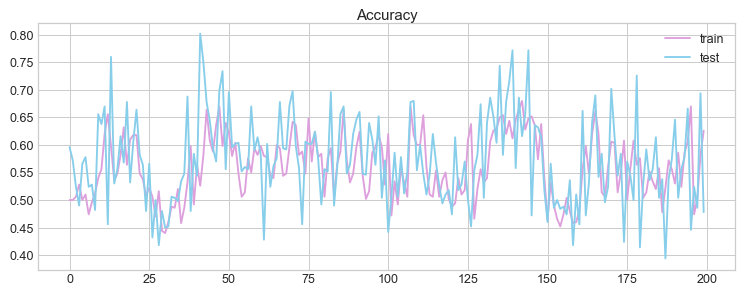

In [8]:
# plot loss learning curves
plt.figure(figsize = (10, 8), dpi = 90)
plt.subplot(211)
plt.title("Cross-Entropy Loss", pad = -40)
plt.plot(history.history["loss"], label = "train", color = "plum")
plt.plot(history.history["val_loss"], label = "test", color = "skyblue")
plt.legend()
plt.show()

# plot accuracy learning curves
plt.figure(figsize = (10, 8), dpi = 90)
plt.subplot(212)
plt.title("Accuracy", pad = -40)
plt.plot(history.history["accuracy"], label = "train", color = "plum")
plt.plot(history.history["val_accuracy"], label = "test", color = "skyblue")
plt.legend()
plt.show()

The plot shows the unstable nature of the training process with the chosen configuration.

The poor performance and erratic changes to the model suggest that the learning rate used to update weights after each training example may be too large and that a smaller learning rate may make the learning process more stable.

We can test this by re-running the model fit with stochastic gradient descent and a smaller
learning rate. <br>
For example, we can drop the learning rate by an order of magnitude from 0.01
to 0.001.

In [9]:
%%capture
opt = SGD(learning_rate = .001, momentum = .9)
model = Sequential([Dense(50, input_dim = 2, activation = "relu", kernel_initializer = "he_uniform"),
                    Dense(3, activation = "softmax")])
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 200, verbose = 0, batch_size = 1)

# evaluate the model :
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print(f"train accuracy : {round(train_acc, 2)}  | test accuracy : {round(test_acc, 2)}")

In [10]:
loss = pd.DataFrame(history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.593998,0.550,0.599485,0.736
1,0.987435,0.660,1.283339,0.418
2,0.645438,0.696,0.585877,0.772
3,0.578901,0.742,0.612333,0.730
4,0.536148,0.764,0.517068,0.804


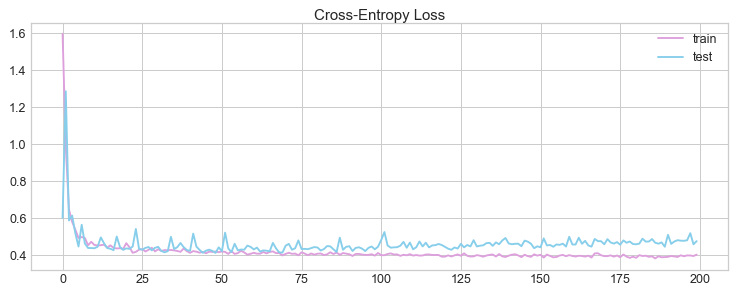

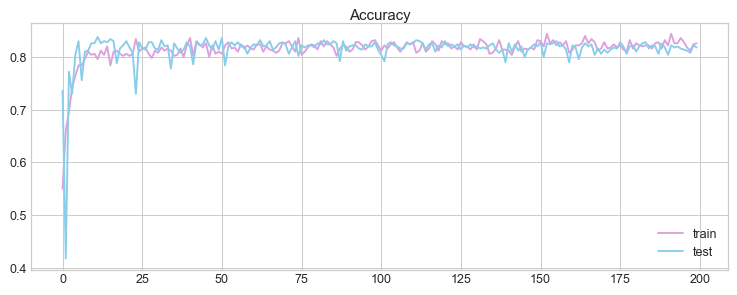

In [11]:
# plot loss learning curves
plt.figure(figsize = (10, 8), dpi = 90)
plt.subplot(211)
plt.title("Cross-Entropy Loss", pad = -40)
plt.plot(history.history["loss"], label = "train", color = "plum")
plt.plot(history.history["val_loss"], label = "test", color = "skyblue")
plt.legend()
plt.show()

# plot accuracy learning curves
plt.figure(figsize = (10, 8), dpi = 90)
plt.subplot(212)
plt.title("Accuracy", pad = -40)
plt.plot(history.history["accuracy"], label = "train", color = "plum")
plt.plot(history.history["val_accuracy"], label = "test", color = "skyblue")
plt.legend()
plt.show()

In [12]:
print(f"train accuracy : {round(train_acc, 2)}  | test accuracy : {round(test_acc, 2)}")

train accuracy : 0.83  | test accuracy : 0.82


The line plot shows the expected behavior. Namely, that the model rapidly learns the
problem as compared to batch gradient descent, leaping up to about 80% accuracy in about
25 epochs rather than the 100 epochs seen when using batch gradient descent. We could have
stopped training at epoch 50 instead of epoch 200 due to the faster training. This is not
surprising. With batch gradient descent, 100 epochs involved 100 estimates of error and 100
weight updates. In stochastic gradient descent, 25 epochs involved (500 x 25) or 12,500 weight
updates, providing more than 10-times more feedback, albeit more noisy feedback, about how
to improve the model.

The line plot also shows that train and test performance remain comparable during training,
as compared to the dynamics with batch gradient descent where the performance on the test
set was slightly better and remained so throughout training. Unlike batch gradient descent, we
can see that the noisy updates result in noisy performance throughout the duration of training.
This variance in the model means that it may be challenging to choose which model to use as
the final model, as opposed to batch gradient descent where performance is stabilized because
the model has converged.